# Predict Star/Galaxy/QSO Using Random Forest Classifier


You are going to use the scikit-learn Random Forest Classifier to predict, whether a particular SDSS source is a STAR, GALAXY or QSO using its photometric properties and position in the sky.


**YOUR TURN** Import pandas, numpy and matplotlib.pyplot

In [1]:
# plotting
import pandas as pd # pandas
import numpy as np # numpy
import matplotlib.pyplot as plt # matplotlib


**YOUR TURN**  read the data from csv file

path = "data/stellar_classification.csv"

***name*** your dataset ***df*** so the name will match with my code at the end of the notebook

In [2]:
# read csv
df = pd.read_csv("data/stellar_classification.csv")

**YOUR TURN**  Print the top few rows from the file using the head() method of Pandas.

In [3]:
df.head(10) # top 10 rows from csv

,obj_ID,alpha,delta,u,g,r,i,z,field_ID,class,fiber_ID
0,1.237660e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,79,GALAXY,171
1,1.237660e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,119,GALAXY,427
2,1.237660e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,120,GALAXY,299
3,1.237660e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,214,GALAXY,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,137,GALAXY,842
5,1.237680e+18,340.995120,20.589476,23.48827,23.33776,21.32195,20.25615,19.54544,110,QSO,741
6,1.237680e+18,23.234926,11.418188,21.46973,21.17624,20.92829,20.60826,20.42573,462,QSO,113
7,1.237680e+18,5.433176,12.065186,22.24979,22.02172,20.34126,19.48794,18.84999,346,GALAXY,15
8,1.237660e+18,200.290475,47.199402,24.40286,22.35669,20.61032,19.46490,18.95852,108,GALAXY,719
9,1.237670e+18,39.149691,28.102842,21.74669,20.03493,19.17553,18.81823,18.65422,122,STAR,232


**YOUR TURN** Check for missing values

.<code>isnull()</code> and <code>sum()</code> is used to find whether there are any missing values in the CSV file.

In [4]:
df.isnull().sum() # checking missing values

obj_ID      0
alpha       0
delta       0
u           0
g           0
r           0
i           0
z           0
field_ID    0
class       0
fiber_ID    0
dtype: int64



**YOUR TURN**  create a subset of the dataset WITHOUT the obj_ID, field_ID and fiber_ID, which are unlikely to help us with classification.

hint.  df.drop(..., axis=1)

In [5]:
df = df.drop(["obj_ID", "field_ID", "fiber_ID"], axis=1)
df.head()

,alpha,delta,u,g,r,i,z,class
0,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,GALAXY
1,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,GALAXY
2,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,GALAXY
3,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,GALAXY
4,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,GALAXY


**YOUR TURN** Make a seaborn "pairplot" to show how well each of the features separates the Galaxies, QSOs and Stars, using the "class" column for the hue.

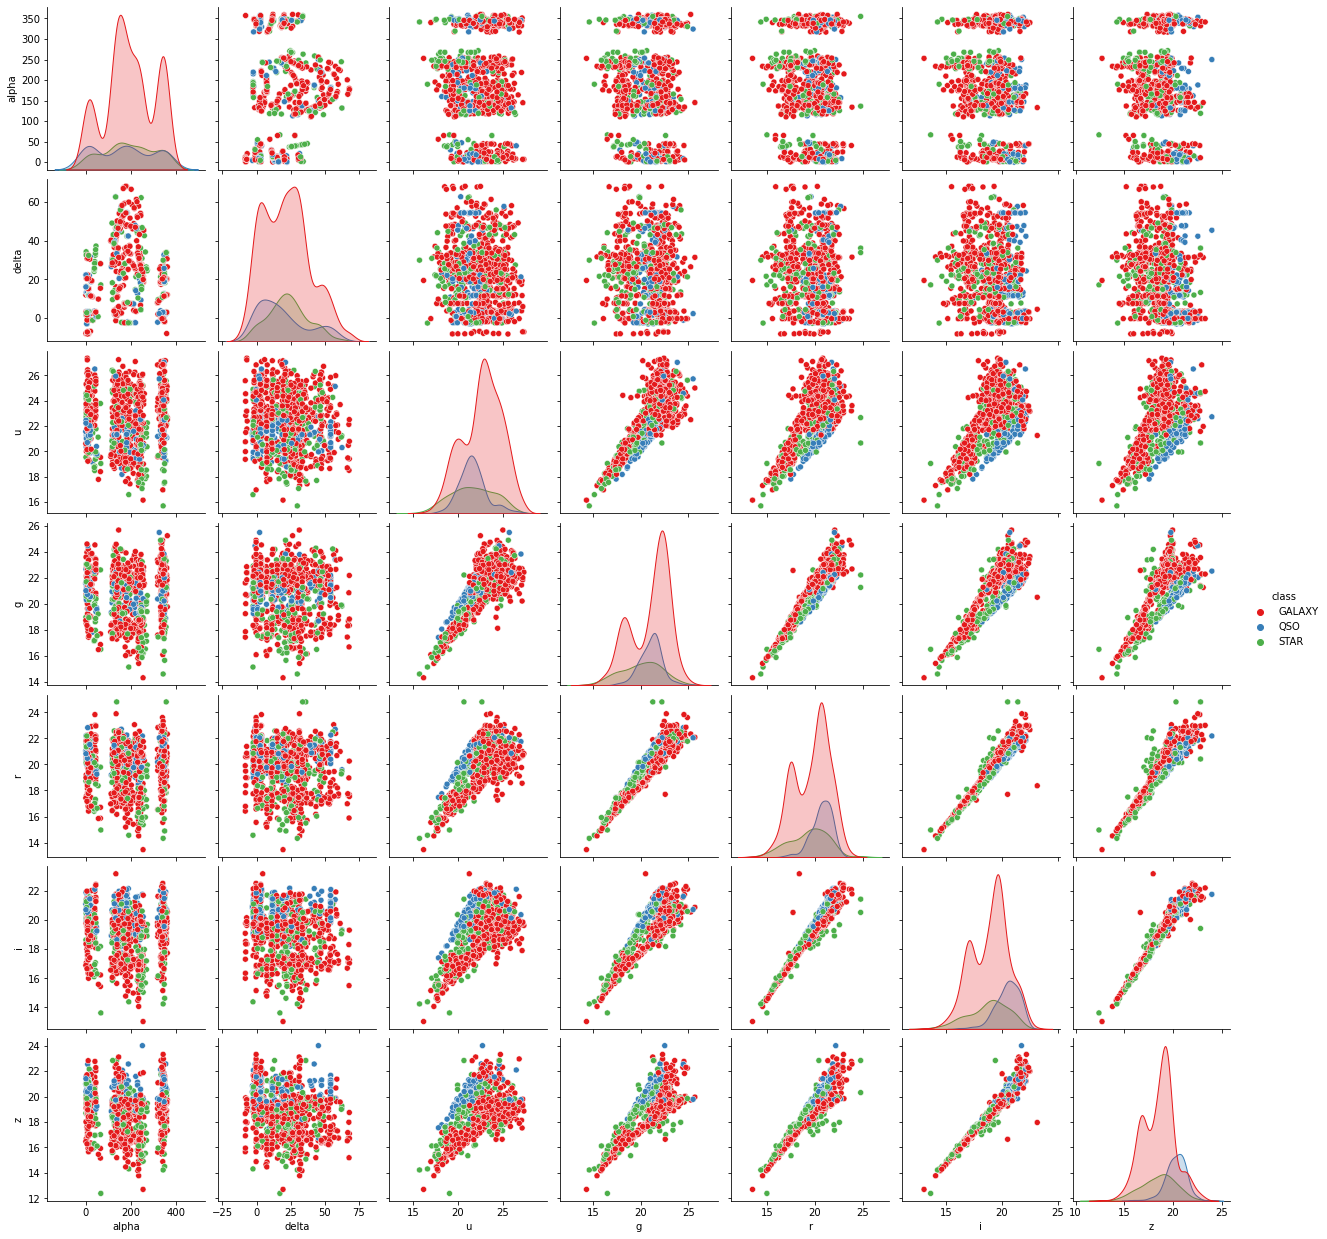

In [6]:
import seaborn as sns
sns.pairplot(df,hue='class',palette='Set1')

* Do you think the data are easily separable by a decision tree algorithm?
* Can you see which features are the most important?
* Will the algorithm generalise well on unseen data? To answer this we need to evaluate a model.

**YOUR TURN**  now create a subset of this dataset called "labels" that only contains 'class' (our label) and another called "features" that does NOT contain 'class'

In [7]:
# get the labels and features datasets
labels = df['class']
features = df.drop(["class"], axis=1)


In [8]:
labels.head()

0    GALAXY
1    GALAXY
2    GALAXY
3    GALAXY
4    GALAXY
Name: class, dtype: object

**YOUR TURN** Split the data into train and test sets
    using the variables that you created above
* use X = features 
* use y = labels
* remember to import the library from sklearn.model_selection import train_test_split
* note that RandomForestClassifier allows us to have strings or numerics as the target labels but only numbers for the features.

Split arrays or matrices into random *train* and *test* subsets.

In [9]:
# split train test data set
from sklearn.model_selection import train_test_split
X_Train, X_Test, y_Train, y_Test = train_test_split(features, labels, test_size = 0.3)

## Random Forest Classifier

<p>A random forest is a <i>meta estimator</i> that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.</p>

<code>n_estimators</code> <i>integer, optional (default=100)</i>  The number of trees in the forest.<br/>



***YOUR TURN*** 
* import the random forest classifier library
* create a random forest classifier object with 10 estimators

In [10]:
from sklearn.ensemble import RandomForestClassifier
RandomForest = RandomForestClassifier(n_estimators = 10) 

**Fit X_Train and y_Train**

<code>fit()</code>Build a forest of trees from the training set (X, y).

**YOUR TURN** fit the X_train and y_train to the classifier that you have created

In [11]:
RandomForest.fit(X_Train, y_Train) # fit data points and labels

RandomForestClassifier(n_estimators=10)

**YOUR TURN** print the score of the training data 
hint: use score method and X_train and y_train

<code>score()</code> Returns the mean accuracy on the given data and labels.

In [12]:
RandomForest.score(X_Train, y_Train)

0.9857142857142858

**YOUR TURN** print the score of the testing data 
hint: use score method and X_test and y_test

In [13]:
RandomForest.score(X_Test, y_Test)

0.7966666666666666

How close are these scores? Any evidence for overfitting? Let's investigate more evaluation metrics

**YOUR TURN** store in a variable called predictions the predicted values of the classifier for the X_test using the predict methods

In [14]:
predictions = RandomForest.predict(X_Test)

**YOUR TURN** import classification_report and confusion_matrix from sklearn.metrics and print the classification report for your true labels y_test compared to the predictions

In [15]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_Test,predictions))

              precision    recall  f1-score   support

      GALAXY       0.82      0.95      0.88       208
         QSO       0.85      0.60      0.71        48
        STAR       0.48      0.30      0.37        44

    accuracy                           0.80       300
   macro avg       0.72      0.62      0.65       300
weighted avg       0.78      0.80      0.78       300



**YOUR TURN** print out the confusion matrix (3x3 in this case)

In [16]:
print (confusion_matrix(y_Test,predictions))

[[197   4   7]
 [ 12  29   7]
 [ 30   1  13]]



* How successful have we been at classifying the various types of object? Are some better than others?

**YOUR TURN**

* print/plot the features importances
* in the solution you will see a different method that turns the result into a dataframe for nicer plotting and the ability to sort the result

([<matplotlib.axis.YTick at 0x21100f5e3a0>,
 [Text(0, 0, 'alpha'),
  Text(0, 1, 'delta'),
  Text(0, 2, 'u'),
  Text(0, 3, 'g'),
  Text(0, 4, 'r'),
  Text(0, 5, 'i'),
  Text(0, 6, 'z')])

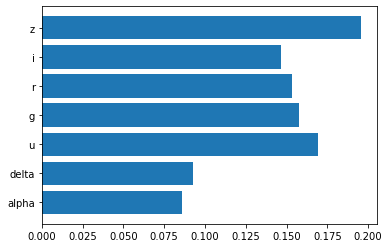

In [17]:
n_features = features.shape[1]
plt.barh(range(n_features),RandomForest.feature_importances_)
plt.yticks(np.arange(n_features),features.columns[0:])

In [18]:
feature_importances = pd.DataFrame(RandomForest.feature_importances_, index = features.columns, 
                                   columns=['importance']).sort_values('importance', ascending=False)
feature_importances.head(10)

,importance
z,0.195545
u,0.169177
g,0.157480
r,0.153370
i,0.146411
delta,0.092392
alpha,0.085626


**YOUR TURN** try to increase the number of estimators in the classifier and see if that changes the results.  Try 1000 for example. Or try limiting the number of levels in the trees.
**Just change the parameters in the codes above** do not write it again. What are the pros and cons?